<a href="https://colab.research.google.com/github/slover1126/slover1126/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2장 머신러닝 프로젝트 처음부터 끝까지**

**파이프라인**


*   데이터 처리 컴포넌트(수집, 전처리, 시각화 등) 이 모여있는 것을 파이프라인 이라고 함
*   한 컴포넌트의 작업이 중단되더라도 이전 과정으로 부터 들어온 결과물로 작업을 이어나갈 수 있음


**2.2.2 성능 측정 지표 선택**


*   회귀 문제의 경우 **평균 제곱근 오차 (RMSE)**를 성능 지표로 사용
*  RMSE는 다음과 같이 계산됨

$$\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h(\mathbf{x}^{(i)}) - y^{(i)} \right)^2}
$$



*   m = 관측치 수.xi = i번째 관측치의 독립변수들의 값(다중회귀의 경우 벡터), h(xi) = i번째 관측치의 예측값, yi = i번째 관측치의 실제 종속변수 값
*   통계학에서의 MSE와는 다르게 자유도가 아닌 전체 데이터 값으로 나눠줌
*   통계학은 모분산의 추정을 위한 것이고 머신러닝에서는 모델의 성능을 평가하기 위함이라 이런 차이가 발생함


*  이상치가 많다면 **평균 절대 오차(MAE)** 를 사용할수도 있음
*  MAE는 다음과 같이 계산됨
 $$
\text{MAE}(\mathbf{X}, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(\mathbf{x}^{(i)}) - y^{(i)} \right|
$$



*   RMSE의 경우는 유클리드 norm을 사용하여 거리를 측정
*   MAE의 경우는 맨해튼 norm을 사용하여 거리를 측정




In [1]:
#맷플롯립 userwarning 없애기

In [2]:
# 1. 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,241 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and direc

In [3]:
import matplotlib.pyplot as plt

# 3. 맷플롯립 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 4. 마이너스 기호 깨짐 방지 (한글 폰트 쓰면 마이너스가 네모로 깨질 수 있음)
plt.rc('axes', unicode_minus=False)

In [4]:
#2.3.5 데이터 다운로드
from pathlib import Path #파일 경로를 다루는 라이브러리
import pandas as pd #데이터 전처리 라이브러리
import tarfile #압축 파일을 쓸수 있게하는 라이브러리
import urllib.request #웹 요청 및 다운로드 도구

def load_housing_data():
    tarball_path =  Path("datasets/housing.tgz") #Path:주소를 운영체제에 맞게 바꿔주는 함수
    if not tarball_path.is_file(): #파일이 없다면 실행
        Path("datasets").mkdir(parents = True, exist_ok = True) #datasets 폴더 만들고 있다면 사용(exist_ok = True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarball_path) #urllib.request.urlretrieve(A,B) :A에 있는 파일을 B에 저장하는 코드
    with tarfile.open(tarball_path) as housing_tarball: #다운받은 파일 열기
        housing_tarball.extractall(path="datasets")  #datasets 안에 전부 풀어두기
    return pd.read_csv("datasets/housing/housing.csv")
housing = load_housing_data()
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

/tmp/ipython-input-89940628.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")  #datasets 안에 전부 풀어두기


In [5]:
#2.3.6 데이터 구조 훑어보기
housing.head() #.head() 함수는 dataframe의 상위 5개 행을 보여줌
# longitude, latitude,housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity 변수들로 구성됨을 알수있음

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() #.info() 함수는 dataframe의 정보들을 요약하여 보여줌
#dataframe 자료형이고, 전체 20640개의 관측치가 있으며 10개의 열변수로 구성됨, total_bedrooms의 경우 20433개만 null값이 아니므로 결측치가 존재함을 확인, ocean_proximity의 경우 범주형 자료임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts() #변수명.["열변수명"].value_counts() 는 열변수에 있는 값들을 카운트해서 보여줌(범주형 요약에 편함)

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [8]:
housing.describe() #.describe() 함수는 요약 통계량(평균, 표준편차, 최대최소값, 중간값, 1,3사분위수)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


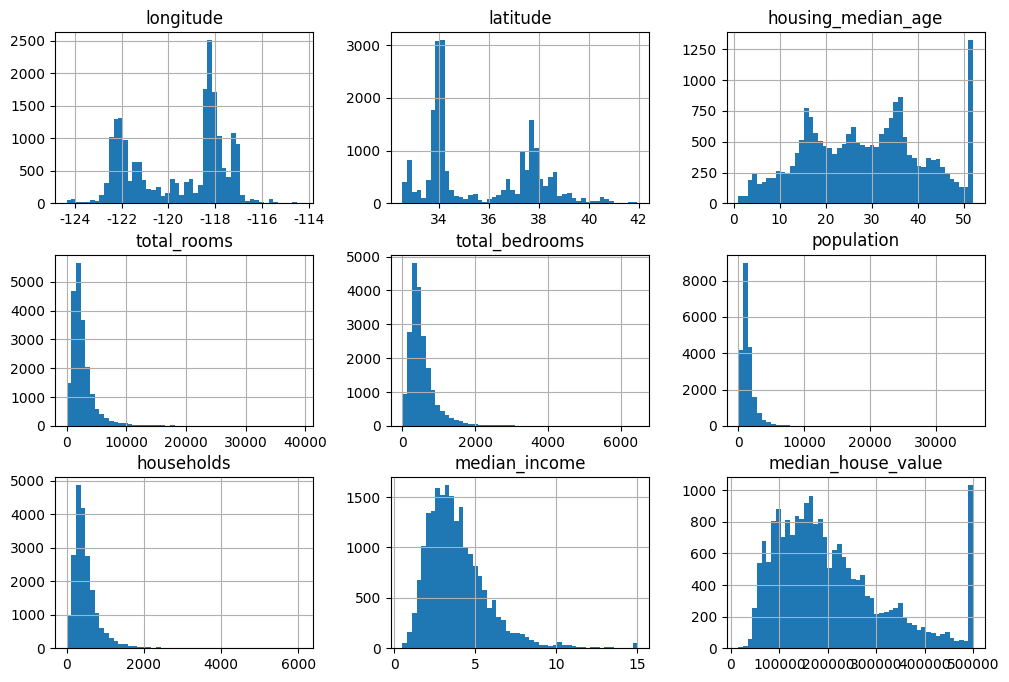

In [9]:
import matplotlib.pyplot as plt #시각화 라이브러리
housing.hist(bins=50, figsize =(12,8)) #bins 옵션: x축을 몇등분 할 건지 설정, figsize =(가로,세로)옵션 : 그래프의 배경 크기 설정
plt.show() #시각화

**2.3.7 테스트 세트 만들기**

*   전체 데이터를 본 후 모델링을 시행하면, 인간의 뇌가 편향된 생각을 할 수 있음(당연히 이 모델이 잘 맞겠지 하는)
*  그러나 이 경우 모델의 잘못된 선택과 적합이 이루어질 수 있음
* 이를 **데이터 스누핑** 편향이라고 함




In [10]:
#테스트 세트 만들기
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #데이터 길이만큼의 숫자의 리스트가 무작위로 섞임(각 숫자는 관측치에 할당함)
    test_set_size = int(len(data) * test_ratio) #테스트 사이즈의 크기(전체 데이터 길이* 테스트 세트로 놓을 비율)
    test_indices = shuffled_indices[:test_set_size] #테스트 데이터의 인덱스는 앞에서부터 테스트 세트의 사이즈 만큼을 슬라이싱
    train_indices = shuffled_indices[test_set_size:] #훈련 데이터는 나머지
    return data.iloc[train_indices], data.iloc[test_indices] # .iloc[] 함수를 이용해 숫자를 데이터의 행으로 반환

#사용(예시)

train_set, test_set = shuffle_and_split_data(housing, 0.2)
#print(train_set) 훈련 데이터로 할당된 데이터 출력
#print(test_set) 테스트 데이터로 할당된 데이터 출력
print(len(train_set),len(test_set)) #훈련,테스트 데이터 사이즈 출력

16512 4128


난수의 초기값을 지정하여 혼련/테스트 데이터셋을 나누는 방법은 데이터의 업데이트 이후 새롭게 데이터셋을 나눌 때 기존의 테스트 데이터셋이 훈련데이터로 섞일수도 있다는 문제가 존재함 ->어떤 데이터로 학습을 진행했는지가 달라지기 때문에 성능 측정이 정확하지 않을 수 있음

따라서 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트로 보내는 방법을 사용

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio *2**32  #crc32(np.int64(identifier)) ->identifier 인자를 넣으면 고유 정수를 출력함/ test_ratio *2**32->해시 최댓값이 2^32개인데 이 중 테스트 비율만큼 커트라인

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column] #df에서 id_column인 열만 지
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio)) #ids.apply() ->괄호 안 함수를 ids의 요소들에 대해 실행/ lambda 구문->테스트 데이터셋에 포함되는지 T/F 여부가 리스트로 나옴
    return data.loc[~in_test_set], data.loc[in_test_set] #테스트 세트가 아닌애들(훈련세트), 테스트 세트인 애들 반환


In [12]:
#주택 데이터는 식별자 칼럼이 없어 행의 인덱스를 id로 사용

housing_with_id = housing.reset_index() #행에 대한 인덱스 열을 추가시킴
#print(housing_with_id)
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
#print(train_set, test_set)

housing_with_id["id"] = housing["longitude"]*1000+housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
print(train_set, test_set)


       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
6          6    -122.25     37.84                52.0       2535.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401

In [13]:
#사이킷런의 함수
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size =0.2, random_state=42)

#train_test_split(데이터셋, test_size = 테스트 세트 비율, random_state= 난수 시드 고정)
# x_train, x_test, y_train, y_test = train_test_split(x값, y값, test_size = 테스트 세트 비율, random_state= 난수 시드 고정)으로도 사용이 가능함(x,y값을 따로 데이터로 가지고 있는 경우 사용)

**샘플링**


*   단순하게 무작위 샘플링이 아니라 전체 모집단의 비율이 잘 반영되도록 샘플링 하여야 함
*   예를 들어 한 국가의 남녀 성비가 4:6이라면, 1000명을 샘플로 뽑을 경우 남자 400명, 여자 600명을 표본으로 삼는 것이 합리적임
* 이처럼 비율로 샘플링 하는 것을 **계층적 샘플링** 이라고 함



<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missin

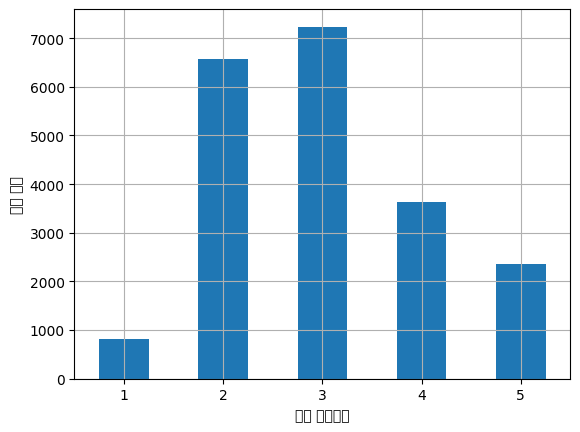

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])
#pd.cut(자를 대상, bins=구간(np.inf 옵션은 마지막 구간보다 얼마나 크더라도 다 마지막 인덱스로 포함시키기), labels=인덱스)

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter= StratifiedShuffleSplit(n_splits = 10, test_size=0.2, random_state=42) #StratifiedShuffleSplit(n_splits = 나누는 시행을 몇 번 할건지, test_size=테스트 사이즈 비율, random_state=난수 고정값 ) ->계층 샘플링을 위한 함수
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]): # splitter.split(데이터셋, 기준열) ->기준열로 분
    strat_train_set_n = housing.iloc[train_index] #실제 행을 뽑아옴
    strat_test_set_n = housing.iloc[test_index] #실제 행을 뽑아옴
    strat_splits.append([strat_train_set_n, strat_test_set_n]) #빈 리스트에 저장
#print(strat_splits)

strat_train_set, strat_test_set = strat_splits[0]
strat_train_set, strat_test_set =train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42) #train_test_split()함수에서 stratify 옵션으로 분할 가능(1번의 시행만 하는 경우)

strat_test_set["income_cat"].value_counts()/len(strat_test_set) #테스트 셋에서의 비율 확인

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

**2.4 데이터 이해를 위한 탐색과 시각화**

In [16]:
housing = strat_train_set.copy() #훈련 데이터의 복사본 생성

**2.4.1 지리적 데이터 시각화 하기**

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151:

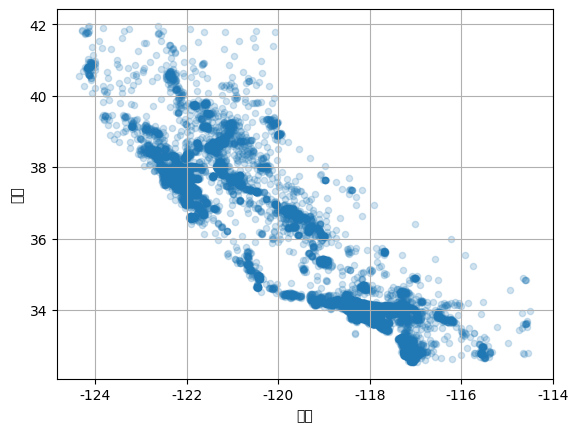

In [17]:
housing.plot(kind="scatter",x="longitude", y= "latitude", grid =True, alpha =0.2) #alpha 옵션->데이터가 밀집된 부분을 잘 보여줌
plt.xlabel("경도")
plt.ylabel("위도")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) miss

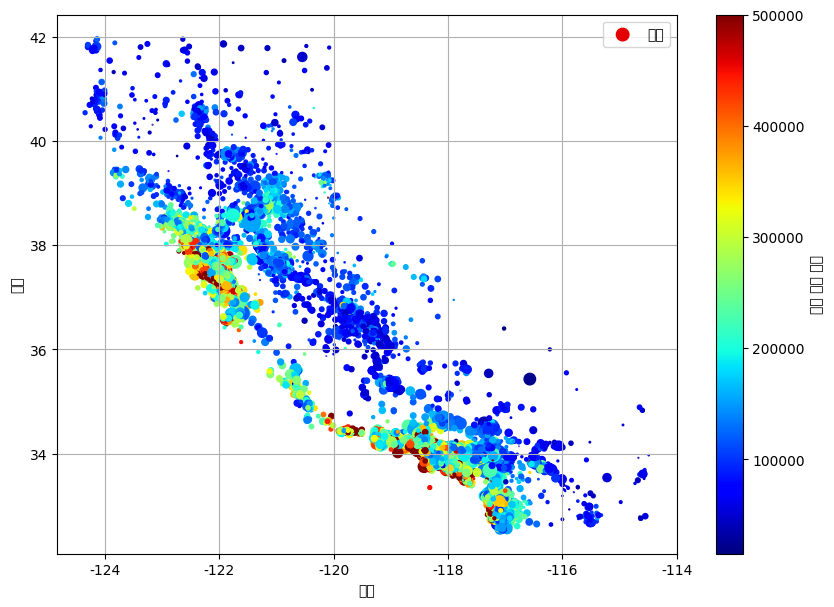

In [18]:
housing.plot(kind="scatter",x="longitude", y= "latitude", grid =True, s=housing["population"]/100, label="인구",c="median_house_value", cmap = "jet", colorbar=True, legend=True,figsize=(10,7))
# s=원 크기 지정/C=점 색 결정/cmap = "jet" 색상 범위
cax=plt.gcf().get_axes()[1] #컬러바 가져오기
cax.set_ylabel("주택 중간 가격") #컬러바 이름 지정
plt.xlabel("경도")
plt.ylabel("위도")
plt.show
#주택 가격이 높은 매물이 위도 38-경도 -122, 위도 34-경도 -117 근처에 많음을 알 수 있음

**2.4.2 상관관계 조사하기**

In [19]:
corr_matrix = housing.corr(numeric_only=True) #.corr()->변수간 상관계수 계산 numerics_only ->숫자만 출력
#print(corr_matrix)

corr_matrix["median_house_value"].sort_values(ascending=False) #"median_house_value"와 나머지 변수들 간 상관관계 출력

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


<function matplotlib.pyplot.show(close=None, block=None)>

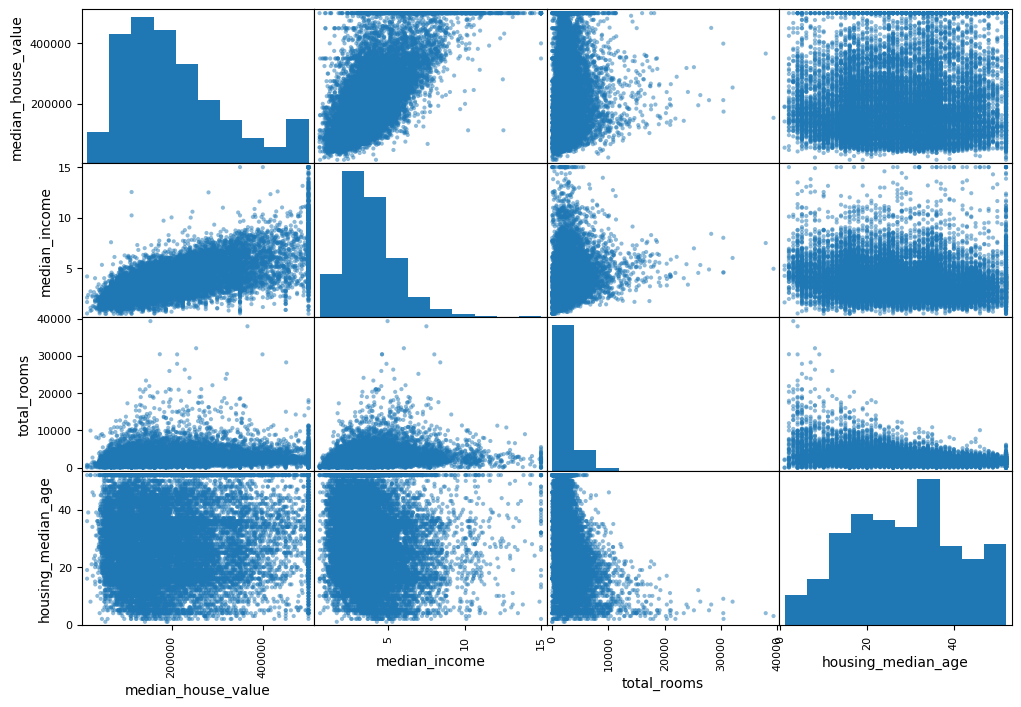

In [20]:
from pandas.plotting import scatter_matrix
attributes =["median_house_value","median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show
#히스토그램->같은 변수들끼리 산점도 행렬이 그려져야 할 때

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

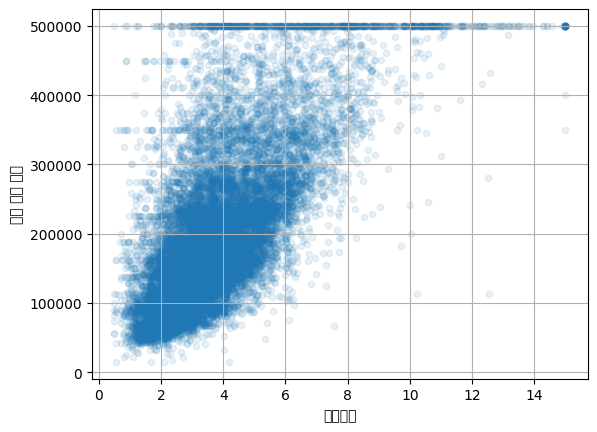

In [21]:
#주택 중간 가격&중위소득이 제일 선형관계가 잘 나타남
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.xlabel("중간소득")
plt.ylabel("중간 주택 가격")
plt.show()
#강한 양의 상관관계가 나타남

In [22]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedtoom_ratio"] = housing["total_bedrooms"]/ housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


**2.5 머신러닝 알고리즘을 위한 데이터 준비**

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1) #strat_train_set 에서 "median_house_value" 열을 분리(예측해야 할 값이므로)/axis=1 ->열을 건드리기
housing_labels = strat_train_set["median_house_value"].copy() # "median_house_value" 열을 복사

total_bedroom 변수에 결측치가 있으니 해결

1.   해당 구역 제거
2.   전체 특성 삭제
3.   누락된 값을 대체



In [24]:
#dropna(), drop(), fillna() 함수로 1,2,3 번 방법들을 이용(inplace=True 옵션 ->원본 데이터프레임을 수정함)
#housing.dropna(subset=["total_bedrooms"], inplace=True) #1

#housing.drop("total_bedrooms", axis=1, inplace=True) #2

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) #3

/tmp/ipython-input-1683391211.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True) #3


In [25]:
#더 간단하게 Simpleimputer가 있음
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median") #strategy = "채울 방식"

In [26]:
#수치 특성만 가진 복사본 생성
housing_num = housing.select_dtypes(include =[np.number])

imputer.fit(housing_num)

imputer.statistics_ #imputer가 저장해둔 각 열 별 중간값 확인

housing_num.median().values #판다스가 계산한 중간값

X= imputer.transform(housing_num)

**2.5.2 텍스트와 범주형 특성 다루기**

In [27]:
housing_cat = housing[["ocean_proximity"]] #뒤에 나올 인코더는 2차원 배열을 입력으로 받기 때문에 이중 리스트로 인덱싱함
#print(housing_cat)
print(housing_cat.shape)
housing_cat.head(8)

(16512, 1)


,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [28]:
#범주형 자료를 숫자로 변환하기 위한 사이킷런의 OrdinalEnocder 이용
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8] #8개가 어떻게 변환되었는지 출력
ordinal_encoder.categories_ #어떤 범주형 자료가 변환되었는지 출력

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
#단순 숫자로 정리 시 실제로 범주형 자료들 간 서열이 없음에도 불구히고 4는 1보다 4배 크다고 판단하여 오류가 발생할 수 있어 다른 방법 이용
#다른 특성이 1 일때, 나머지 특성을 전부 0으로 하는 원-핫 인코딩 방식을 사용
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder() #출력은 희소 행렬
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
housing_cat_1hot.toarray()
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
#판다스의 get_dummies() 함수 존재
df_test = pd.DataFrame({"ocean_proximity":["INLAND", "NEAR BAY"]})
#print(df_test)
pd.get_dummies(df_test)
#onehot 인코더의 경우 기존의 학습한 내용을 기억하고 있다는 점에서 차이가 있음

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [31]:
#새로운 카테고리가 들어온 경우(판다스)
df_test_unknown = pd.DataFrame({"ocean_proximity":["xxx", "NEAR BAY"]})
pd.get_dummies(df_test_unknown)
#똑같이 데이터 프레임에 TF 형태로 반환

#새로운 카테고리가 들어온 경우(인코더)
cat_encoder.handle_unknown = "ignore" #새로 들어온 카테고리를 0으로 처리
cat_encoder.transform(df_test_unknown)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (2, 5)>

**2.5.3 특성 스케일과 변환**

중간 소득의의 경우 숫자의 범위가 0부터 15이고 방 개수의 경우 6~39320 인데, 변환을 하지 않고 모델을 학습시킬 경우 숫자가 큰 쪽인 방 개수에 더 많은 가중치가 가해질 우려가 있음

따라서 여러 변수들이 같은 범위의 값을 갖도록 하는 변환이 필요함.

방법에는 크게 **min-max 스케일링과 표준화**가 있음



1.  **min-max 스케일링**


*   min-max 스케일링은 다음과 같이 계산됨 (범위가 (a,b) 인 경우)

$$x_{new} = a + \frac{(x - \min(x))(b - a)}{\max(x) - \min(x)}$$

*  x가 최대값인 경우 b가 나오고, x가 최솟값인 경우 a가 나오게 됨
* 다만 극단값이 존재하는 경우 그 값만 경계에 가까이에 있고 나머지 값들은 멀리 떨어져서 값을 갖게 됨


2.   **표준화**

* 표준화는 다음과 같이 계산됨

$$x_{std} = \frac{x - \text{mean}(x)}{\text{std}(x)}$$

* 평균이 0, 표준편차가 1이게 되고, 이상치에 덜 민감함


In [32]:
#sklearn의 min=max 스케일링
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1)) #feature_range(a,b):a,b 사이 값으로 변환할 범위 지정
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

#sklearn의 표준화
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

**데이터의 분포가 꼬리가 두꺼운 경우**


*   멱법칙 분포(꼬리가 길고 두꺼운 경우) ->로그를 씌우기
*   버킷타이징 이용(연속적인 숫자들을 범주형으로 바꾸기)

**분포가 멀티모달인 경우**



*   버킷타이징 이용(이 경우 원-핫 인코딩 필수)
*   **방사 기저 함수(RBF)** 이용

In [33]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]],[[35]], gamma=0.1)

#역변환을 수행하는 inverse_transform 함수
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) #타깃 값의 수치를 조정
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels) #스케일링
some_new_data = housing[["median_income"]].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predicitions = target_scaler.inverse_transform(scaled_predictions)

In [34]:
#2.5.4 사용자 정의 변환기
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma = 0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
ratio_transformer = FunctionTransformer(lambda X: X[:,0]/X[:,[1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 , 1.5 ],
       [0.25, 0.75]])

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self,X):
        check_is_fitted(X)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X-self.mean_
        return X / self.scale_

In [36]:
from sklearn.cluster import KMeans
class CluseterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma = 1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X,y = None, sample_weight = None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i}유사도"for i in range(self.n_clusters)]
cluster_simil = CluseterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight = housing_labels)
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

In [37]:
#2.5.5 변환 파이프라인
#수치 특성에서 누락된 값을 대체하고 스케일을 조정하는 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline
num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")), ("standardize",StandardScaler())])

#make_pipeline 이용
num_pipeline = make_pipeline(SimpleImputer(strategy = "median"),StandardScaler())

housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

#데이터프레임으로 재구성하려면 get_features_names_out() 메서드 이용
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)

In [38]:
from sklearn.compose import ColumnTransformer
num_attributes =["longitude","latitude", "housinf_median_age", "total_rooms", "total_bedrooms", "population","housholds", "median_income"]
cat_attributes = ["ocean_proximity"]

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([("num", num_pipeline, num_attributes), ("cat", cat_pipeline, cat_attributes)])

In [41]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
housing_prepared = preprocessing.fit_transform(housing)

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [45]:
def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, features_name_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state = 42 )
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms","total_rooms"]),
    ("rooms_per_house", ratio_pipeline(),["total_rooms","households"]),
    ("people_per_house", ratio_pipeline(), ["population","households"]),
    ("log",log_pipeline,["total_bedrooms", "total_rooms","population","households","median_income"]),
    ("geo",cluster_simil,["latitude", "logitude"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include=object))
],
remainder = default_num_pipeline)
